In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.simplefilter('ignore', np.RankWarning)

**Exercise 14.1.** Derive an expression satisfied by the optimum of the regression problem equation (14.8) by setting the gradient to zero. Do not invert any matrices. The resulting relation is called the *normal equation*.

**Answer:**

$$
\begin{align}
\frac{\partial}{\partial \mathbf{w}} \left( \sum_{i=1}^N \left( y_i - \mathbf{w}^T \mathbf{x}_i \right)^2 \right) &= 0 \\
\sum_{i=1}^N \left( y_i - \mathbf{w}^T \mathbf{x}_i \right) \mathbf{x}_i &= 0 \\
\sum_{i=1}^N y_i \mathbf{x}_i - \mathbf{w}^T \sum_{i=1}^N \mathbf{x}_i \mathbf{x}_i &= 0 \\
\mathbf{w}^T \sum_{i=1}^N \mathbf{x}_i \mathbf{x}_i &= \sum_{i=1}^N y_i \mathbf{x}_i \\
\mathbf{w}^T \left( \sum_{i=1}^N \mathbf{x}_i \mathbf{x}_i \right) &= \sum_{i=1}^N y_i \mathbf{x}_i \\
\mathbf{w}^T \mathbf{X}^T \mathbf{X} &= \mathbf{X}^T \mathbf{y}
\end{align}
$$


**Exercise 14.2.** When would we use a more descriptive model, for example, with polynomial features, versus a simpler model like linear regression?

**Answer:** When we have a lot of data, we can test a more descriptive model with some validation data and see if it performs better than the simpler model. Also if we have some knowledge about the problem, we can use it to choose a more descriptive model.


**Exercise 14.3.** A linear regression problem of the form in equation (14.8) is not always solved analytically, and optimization techniques are used instead. Why is this the case?

**Answer:** Matrix inversion is computationally expensive, so it is not always feasible to solve the problem analytically if we have a large number of data and dimensions.


**Exercise 14.4.** Suppose we evaluate our objective function at four points: 1, 2, 3, and 4, and we get back 0, 5, 4, and 6. We want to fit a polynomial model $f(x) = \sum_{i=0}^k \theta_i x^i$. Compute the leave-one-out cross validation estimate of the mean squared error as $k$ varies between 0 and 4. According to this metric, what is the best value for $k$, and what are the best values for the elements of $\theta$?

**Answer:**

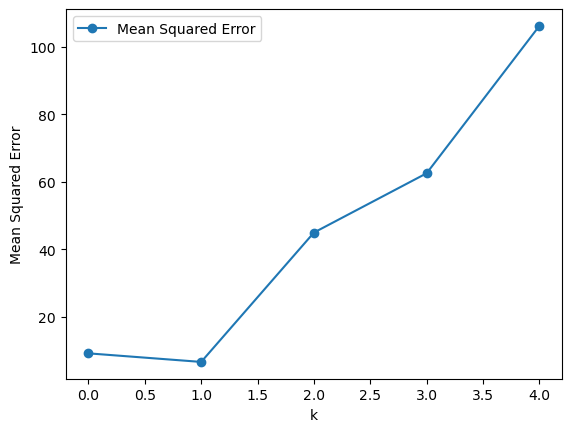

In [32]:
x = [1,2,3,4]
y = [0,5,4,6]
loo = LeaveOneOut()

k_val = [0,1,2,3,4]

def polynomial_regression(x,parameters):
    return x**4*parameters[0] + x**3*parameters[1] + x**2*parameters[2] + x*parameters[3] + parameters[4]

result={}

for k in k_val:
    error = []
    for train_index, test_index in loo.split(x):
        X_train, X_test = np.array(x)[train_index], np.array(x)[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
        parameters = np.polyfit(X_train, y_train, k)
        parameters = [0]*(len(k_val)-len(parameters)) + list(parameters)
        error.append((polynomial_regression(X_test,parameters) - y_test)**2)
    result[k] = np.mean(error)

plt.plot(list(result.keys()),list(result.values()), 'o-', label='Mean Squared Error')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Fitted Coefficients: [ 1.7 -0.5]


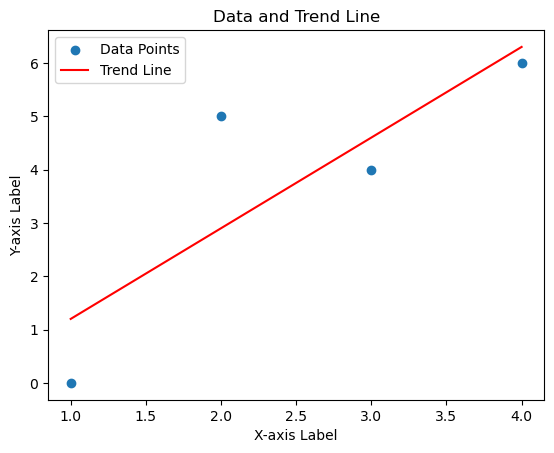

In [34]:
coefficients = np.polyfit(x, y, 1)
print("Fitted Coefficients:", coefficients)

trend_line = np.polyval(coefficients, x)

plt.scatter(x, y, label='Data Points')
plt.plot(x, trend_line, color='red', label='Trend Line')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Data and Trend Line')
plt.legend()
plt.show()